In [98]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('pima indians diabetes.csv') #import pima indians diabetes dataset
df 

,Pregnancy,PGC,DBP,TST,SI,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


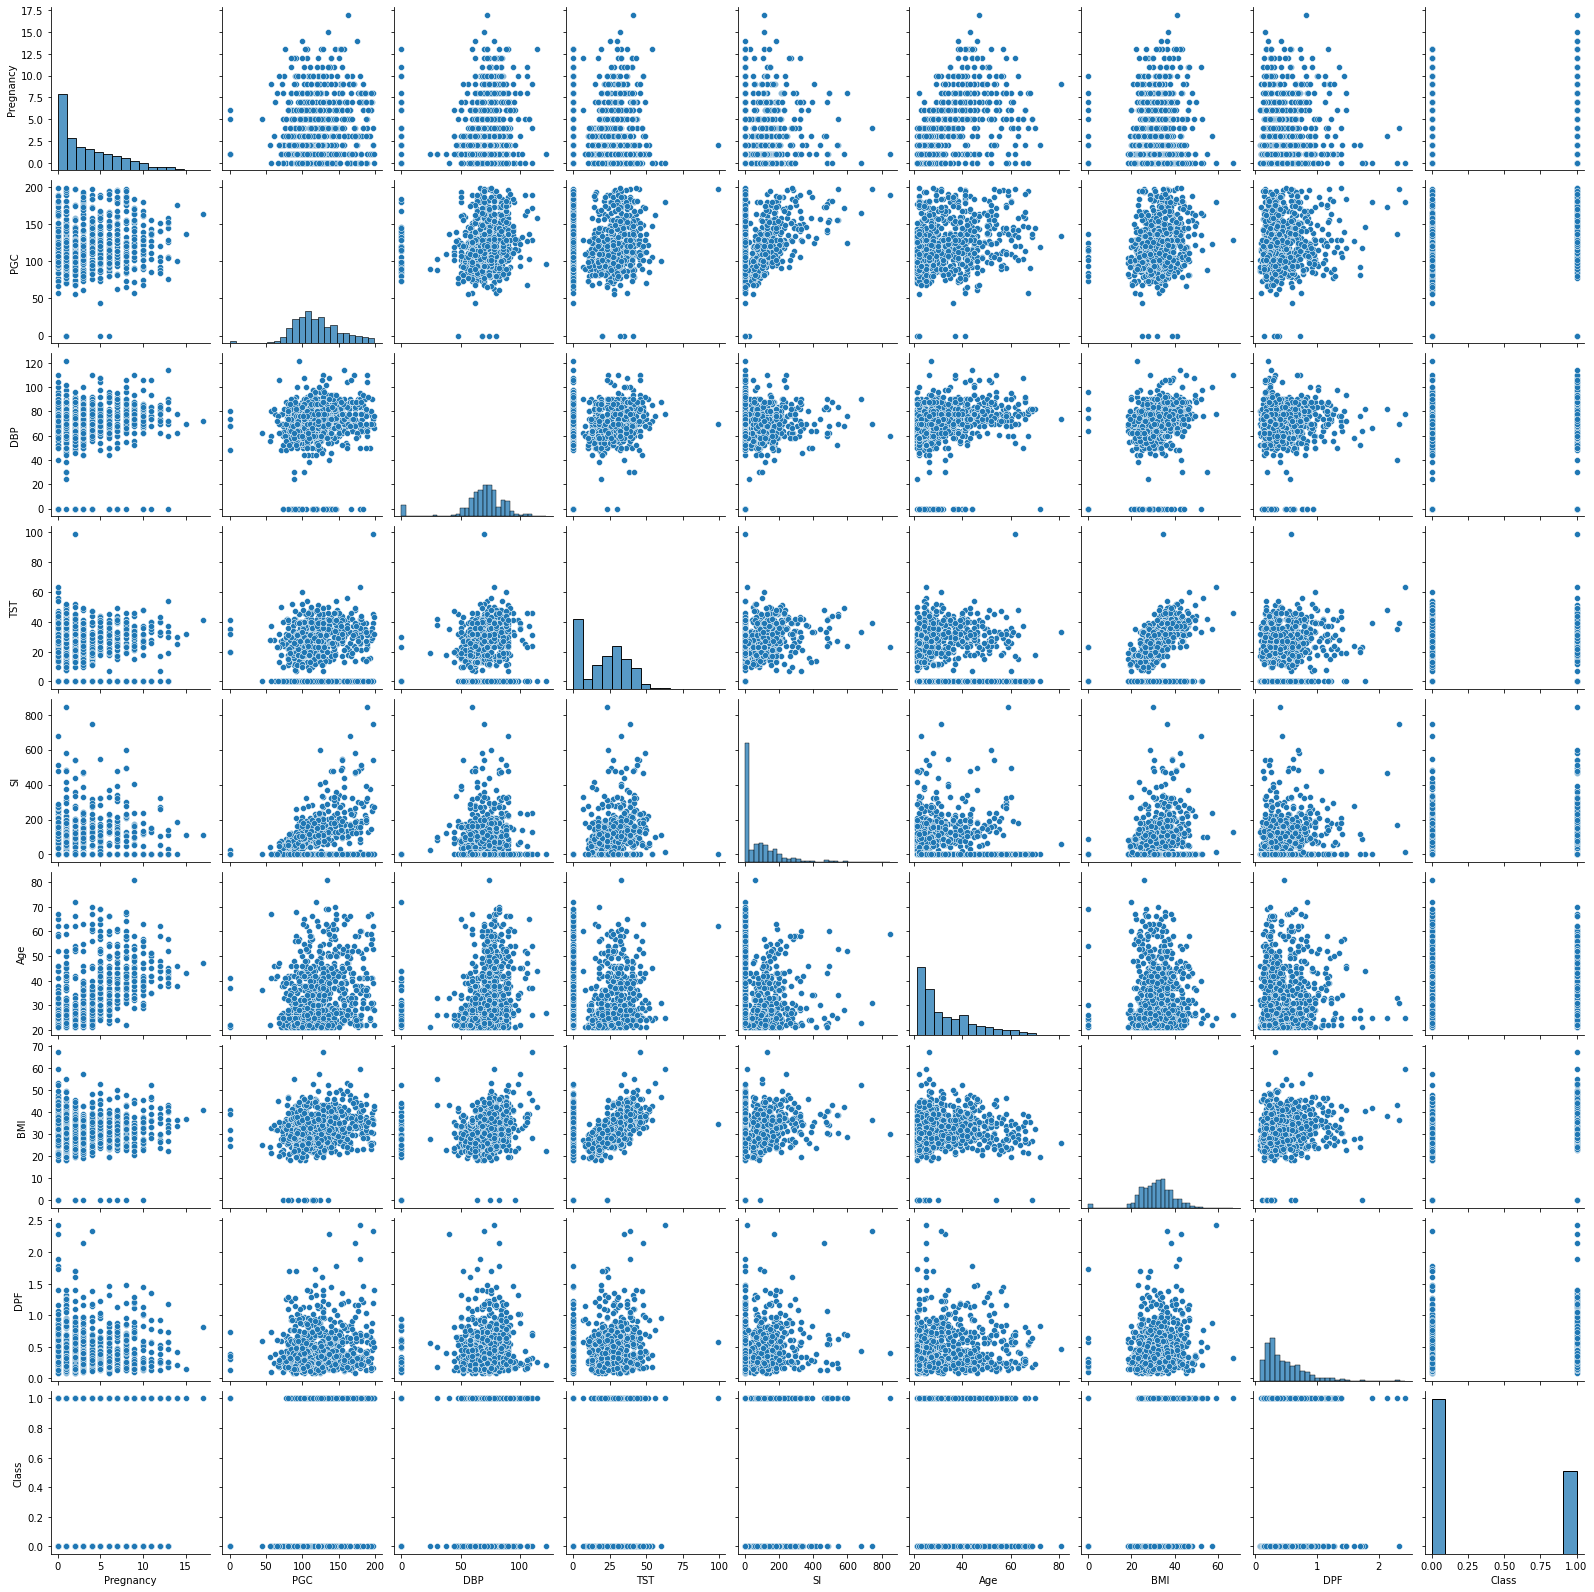

<Figure size 432x288 with 0 Axes>

In [53]:
sns.pairplot(df[['Pregnancy', 'PGC', 'DBP', 'TST', 'SI', 'Age', 'BMI', 'DPF', 'Class']]) 
plt.show() #see distribution of all the variables and the relationships with each other

In [72]:
x = df.drop('Class',axis=1) #separate the other attributes from the predicting attribute
y = df['Class'] #separte the predicting attribute into Y for model training 

In [73]:
from sklearn.preprocessing import StandardScaler
standardizer= StandardScaler()  #Create a standardizer
x_std= standardizer.fit_transform(x) #Standardizing the x values

Text(0, 0.5, 'Training accuracy %')

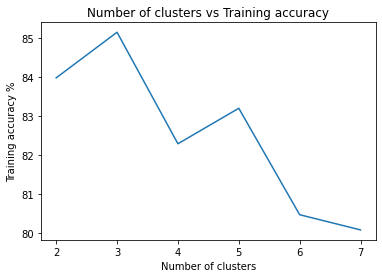

In [97]:
acc_train = []  
clusters = [] #assigning null values
for i in range(2, 8): #predicting accuracy from 2 to 8 neighbors
    knn= KNeighborsClassifier(n_neighbors=i, n_jobs=-1).fit(x_std, y) 
    prediction = knn.predict(x_std)
    acc = accuracy_score(y, prediction)
    clusters.append(i)
    acc_train.append(100*acc)
#print(acc_train)
plt.plot(clusters, acc_train)
plt.title("Number of clusters vs Training accuracy")
plt.xlabel("Number of clusters")
plt.ylabel("Training accuracy %")

In [75]:
#importing KNeighbors Classfier from sklearn
from sklearn.neighbors import KNeighborsClassifier
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [79]:
# splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state = 1)

In [80]:
# Creating KNN classifier and fitting the classifier into the data
knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train,y_train)

In [92]:
predicted = knn.predict(x_test) #predicted test data
predicted

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [95]:
#metrics
print(accuracy_score(y_test, predicted)) 
print(confusion_matrix(y_test, predicted)) 
print(classification_report(y_test, predicted))

0.7207792207792207
[[82 17]
 [26 29]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        99
           1       0.63      0.53      0.57        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.71       154



In [27]:
# initialise data of lists
data = {'Pregnancy':[5], 'PGC':[100], 'DBP':[65], 'TST':[22], 'SI':[0],'BMI':[24], 'DPF':[0.21], 'Age':[22] }
 
# Create DataFrame
dx = pd.DataFrame(data)

In [28]:
dx_std=standardizer.fit_transform(dx) #standardizing the dataframe
pred = knn.predict(dx_std) 
print(pred) #printing y value for given x values

[0]


In [59]:
from sklearn.decomposition import PCA
features=StandardScaler().fit_transform(x) #Standardize the feature matrix
pca= PCA(n_components=0.99, whiten=True) #Create a PCA that will retain 99% of variance
features_pca=pca.fit_transform(features) #Conduct PCA
#show results
print ("Original number of features:", features.shape[1])
print("Reduced number of features:",features_pca.shape[1])

Original number of features: 8
Reduced number of features: 8
